<a href="https://colab.research.google.com/github/mohamedalaouiysf/TimeSeries/blob/main/Final_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
from statsmodels.tsa.arima.estimators.statespace import SARIMAX
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['figure.figsize'] = [15, 5]

In [6]:
# Charger les données DPAE
df = pd.read_excel('dpa.xlsx')

In [7]:
df.head()

,Année,Trimestre,﻿Dernier jour du mois,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
0,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
1,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
2,2000,2,2000-04-30,Contrat de plus d'un mois,CDI,274633,282960
3,2000,2,2000-05-31,Contrat de plus d'un mois,CDI,256064,283773
4,2000,2,2000-06-30,Contrat de plus d'un mois,CDI,248450,280461


In [8]:
print(df.dtypes)

Année                     int64
Trimestre                 int64
﻿Dernier jour du mois    object
Durée de contrat         object
Nature de contrat        object
DPAE (brut)               int64
DPAE (cvs)                int64
dtype: object


In [9]:
df = df.rename(columns={'﻿Dernier jour du mois': 'Dernier jour du mois'})

In [10]:
df['Dernier jour du mois'] = pd.to_datetime(df['Dernier jour du mois'])
df.dtypes

Année                            int64
Trimestre                        int64
Dernier jour du mois    datetime64[ns]
Durée de contrat                object
Nature de contrat               object
DPAE (brut)                      int64
DPAE (cvs)                       int64
dtype: object

In [11]:
df.set_index('Dernier jour du mois', inplace=True)

In [12]:
df_cdi = df[df['Nature de contrat']=='CDI']
df_cdd = df[df['Nature de contrat']!='CDI']

<Axes: xlabel='Dernier jour du mois'>

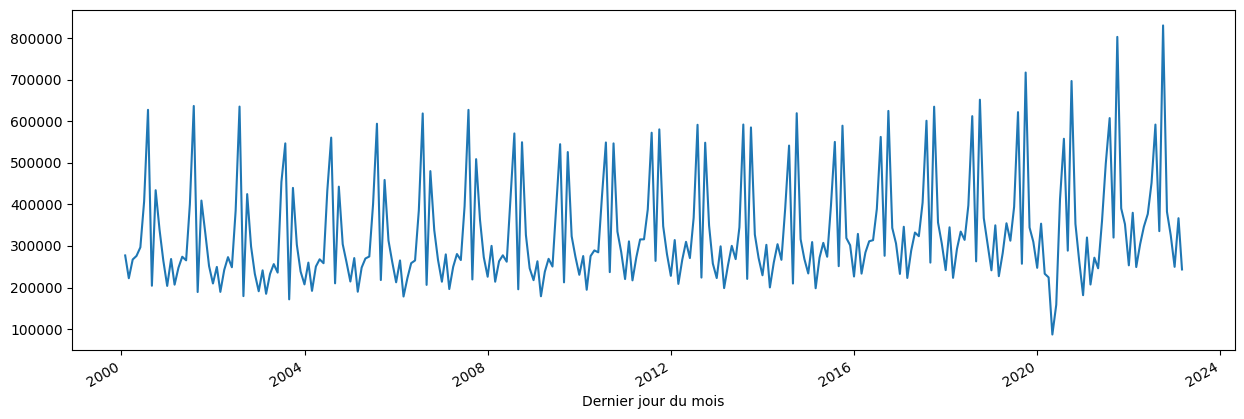

In [13]:
df_cdd['DPAE (brut)'].plot()

<Axes: xlabel='Dernier jour du mois'>

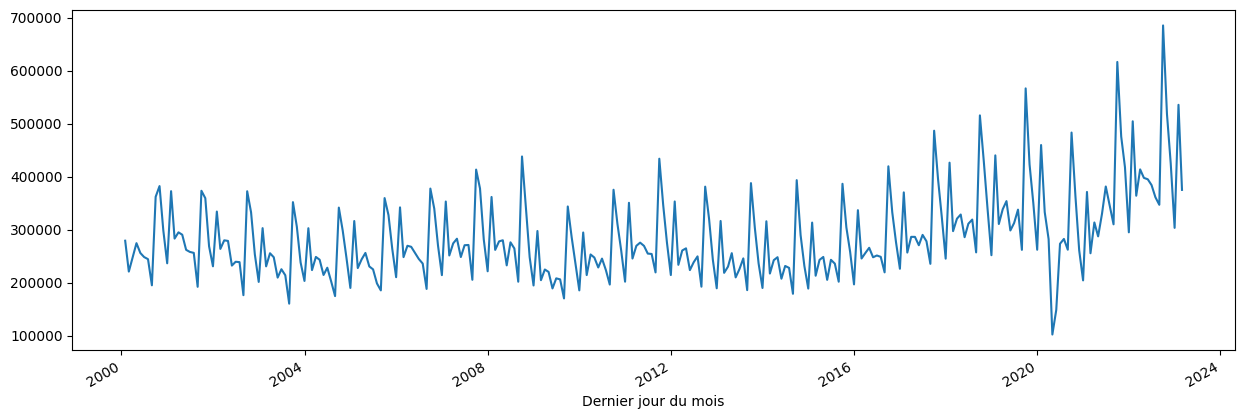

In [ ]:
df_cdi['DPAE (brut)'].plot()

In [14]:
grouped = df_cdd.groupby('Année')
description = grouped['DPAE (brut)'].describe()
print(description)

       count           mean            std       min        25%       50%  \
Année                                                                       
2000    12.0  318357.083333  121374.160101  203868.0  254345.75  276531.0   
2001    12.0  307536.416667  125368.925778  189135.0  238196.00  266957.0   
2002    12.0  295839.500000  130537.170466  179269.0  222395.00  249158.5   
2003    12.0  292621.833333  120465.656975  171477.0  226188.00  239876.0   
2004    12.0  304544.750000  113276.416871  191954.0  241473.25  260515.0   
2005    12.0  309263.833333  118341.788448  189854.0  240493.25  270270.5   
2006    12.0  308269.250000  129428.794669  178356.0  220516.00  265085.0   
2007    12.0  323746.500000  129701.722601  196324.0  243747.75  276351.5   
2008    12.0  319875.666667  126502.608395  195711.0  239136.25  270349.0   
2009    12.0  308658.583333  119016.228028  178951.0  236097.25  266067.0   
2010    12.0  326138.583333  118167.213503  194579.0  265965.75  285183.5   

Les valeurs du DPAE Brut annuelles varient considérablement d'une année à l'autre, atteignant un minimum de 86 869 en 2020 (à cause du Covid). Les années les plus récentes (2021-2023) montrent une tendance à la hausse dans les valeurs annuelles, avec une moyenne de 402 047 en 2022 (la période post Covid).

In [ ]:
grouped2 = df_cdd.groupby('Trimestre')
description2 = grouped2[['DPAE (brut)']].describe()
print(description2)

          DPAE (brut)                                                    \
                count           mean            std       min       25%   
Trimestre                                                                 
1                71.0  257736.253521   48166.842433  178356.0  222847.0   
2                69.0  323629.449275   72333.072943   86869.0  269749.0   
3                69.0  464227.231884  178924.551679  171477.0  262936.0   
4                69.0  279865.318841   52810.320979  181481.0  232872.0   

                                         
                50%       75%       max  
Trimestre                                
1          253932.0  283647.0  379830.0  
2          312661.0  389042.0  498278.0  
3          546768.0  594082.0  830629.0  
4          271013.0  325989.0  390359.0  


In [ ]:
piv1 = pd.pivot_table(df_cdd, index=['Trimestre'],columns=['Année'])
piv1.head()

DPAE (brut)                                               \
Année               2000           2001           2002           2003   
Trimestre                                                               
1          255606.666667  241008.000000  227149.000000  219492.000000   
2          326543.666667  313430.333333  302266.666667  315354.666667   
3          421970.666667  411712.333333  413116.666667  385991.333333   
4          269307.333333  263995.000000  240825.666667  249649.333333   

                                                                       \
Année               2004           2005           2006           2007   
Trimestre                                                               
1          234104.333333  236216.333333  222042.000000  241897.666667   
2          319697.000000  314929.333333  303065.333333  314063.666667   
3          404465.000000  423614.333333  435066.333333  451880.000000   
4          259912.666667  262295.333333  272903.333333  287144.666667   

                                         ...     DPAE (cvs)                 \
Année               2008           2009  ...           2014           2015   
Trimestre                                ...                                 
1          259131.000000  226667.333333  ...  324328.333333  325998.333333   
2          318226.666667  304316.000000  ...  326754.333333  333218.333333   
3          438666.000000  427713.666667  ...  320152.666667  334373.000000   
4          263479.000000  275937.333333  ...  323904.666667  337491.333333   

                                                                       \
Année               2016           2017           2018           2019   
Trimestre                                                               
1          353761.000000  355221.000000  362653.333333  366884.666667   
2          343922.666667  369012.000000  364083.333333  367080.666667   
3          356531.000000  360012.000000  360582.333333  365706.000000   
4          354840.000000  364138.666667  363214.000000  364593.000000   

                                                                  
Année               2020           2021           2022      2023  
Trimestre                                                         
1          340649.666667  339458.333333  398736.666667  388421.5  
2          212397.333333  370018.333333  403612.000000       NaN  
3          363712.666667  404664.000000  411504.000000       NaN  
4          317572.333333  403123.000000  392971.333333       NaN  

[4 rows x 48 columns]

<Axes: xlabel='Trimestre'>

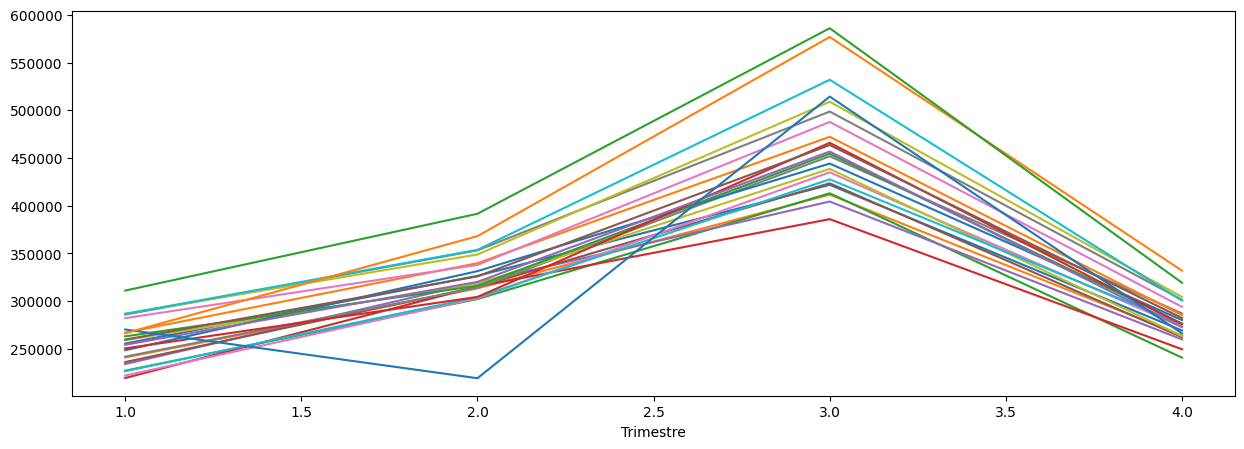

In [ ]:
piv1['DPAE (brut)'].plot(legend = None)

On remarque que les valeurs du DPAE brut augmentent chaque 2ème et 3ème trimestre, c'est la période la plus actif de l'année.

In [ ]:
piv1.describe()

DPAE (brut)                                               \
Année           2000           2001           2002           2003   
count       4.000000       4.000000       4.000000       4.000000   
mean   318357.083333  307536.416667  295839.500000  292621.833333   
std     75600.457593   75739.124756   84735.173612   74002.823192   
min    255606.666667  241008.000000  227149.000000  219492.000000   
25%    265882.166667  258248.250000  237406.500000  242110.000000   
50%    297925.500000  288712.666667  271546.166667  282502.000000   
75%    350400.416667  338000.833333  329979.166667  333013.833333   
max    421970.666667  411712.333333  413116.666667  385991.333333   

                                                                   \
Année           2004           2005           2006           2007   
count       4.000000       4.000000       4.000000       4.000000   
mean   304544.750000  309263.833333  308269.250000  323746.500000   
std     75647.256401   82966.081401   90903.736254   90463.393711   
min    234104.333333  236216.333333  222042.000000  241897.666667   
25%    253460.583333  255775.583333  260188.000000  275832.916667   
50%    289804.833333  288612.333333  287984.333333  300604.166667   
75%    340889.000000  342100.583333  336065.583333  348517.750000   
max    404465.000000  423614.333333  435066.333333  451880.000000   

                                     ...     DPAE (cvs)                 \
Année           2008           2009  ...           2014           2015   
count       4.000000       4.000000  ...       4.000000       4.000000   
mean   319875.666667  308658.583333  ...  323785.000000  332770.250000   
std     83634.843285   85608.052923  ...    2727.655716    4861.997855   
min    259131.000000  226667.333333  ...  320152.666667  325998.333333   
25%    262392.000000  263619.833333  ...  322966.666667  331413.333333   
50%    290852.833333  290126.666667  ...  324116.500000  333795.666667   
75%    348336.500000  335165.416667  ...  324934.833333  335152.583333   
max    438666.000000  427713.666667  ...  326754.333333  337491.333333   

                                                                   \
Année           2016           2017           2018           2019   
count       4.000000       4.000000       4.000000       4.000000   
mean   352263.666667  362095.916667  362633.250000  366066.083333   
std      5676.322616    5876.853582    1488.475143    1154.569549   
min    343922.666667  355221.000000  360582.333333  364593.000000   
25%    351301.416667  358814.250000  362135.583333  365427.750000   
50%    354300.500000  362075.333333  362933.666667  366295.333333   
75%    355262.750000  365357.000000  363431.333333  366933.666667   
max    356531.000000  369012.000000  364083.333333  367080.666667   

                                                              
Année           2020           2021           2022      2023  
count       4.000000       4.000000       4.000000       1.0  
mean   308583.000000  379315.916667  401706.000000  388421.5  
std     66833.229868   31007.389176    7847.398342       NaN  
min    212397.333333  339458.333333  392971.333333  388421.5  
25%    291278.583333  362378.333333  397295.333333  388421.5  
50%    329111.000000  386570.666667  401174.333333  388421.5  
75%    346415.416667  403508.250000  405585.000000  388421.5  
max    363712.666667  404664.000000  411504.000000  388421.5  

[8 rows x 48 columns]

In [ ]:
piv2 = pd.pivot_table(df_cdd, index=['Année'])
piv2.head()

,DPAE (brut),DPAE (cvs),Trimestre
Année,,,
2000,318357.083333,320575.333333,2.5
2001,307536.416667,307597.416667,2.5
2002,295839.500000,292842.000000,2.5
2003,292621.833333,290072.833333,2.5
2004,304544.750000,303580.416667,2.5


In [ ]:
df_cdd

,Année,Trimestre,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,,,
2000-02-29,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
2000-03-31,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
2000-12-31,2000,4,Contrat de plus d'un mois,CDD de plus d'un mois,203868,315242
2001-02-28,2001,1,Contrat de plus d'un mois,CDD de plus d'un mois,206800,318447
2001-03-31,2001,1,Contrat de plus d'un mois,CDD de plus d'un mois,247699,307696
...,...,...,...,...,...,...
2022-06-30,2022,2,Contrat de plus d'un mois,CDD de plus d'un mois,451693,401949
2022-08-31,2022,3,Contrat de plus d'un mois,CDD de plus d'un mois,335646,418876
2022-10-31,2022,4,Contrat de plus d'un mois,CDD de plus d'un mois,382254,392120


In [ ]:
ts_cdd = df_cdd.drop(['DPAE (cvs)','Année','Trimestre','Durée de contrat','Nature de contrat'],axis=1)
ts_cdi = df_cdi.drop(['DPAE (cvs)','Année','Trimestre','Durée de contrat','Nature de contrat'],axis=1)

In [ ]:
ts_cdd.head()

,DPAE (brut)
Dernier jour du mois,
2000-02-29,222287
2000-03-31,267406
2000-12-31,203868
2001-02-28,206800
2001-03-31,247699


In [ ]:
ts_cdd=ts_cdd.sort_index()
ts_cdi=ts_cdi.sort_index()

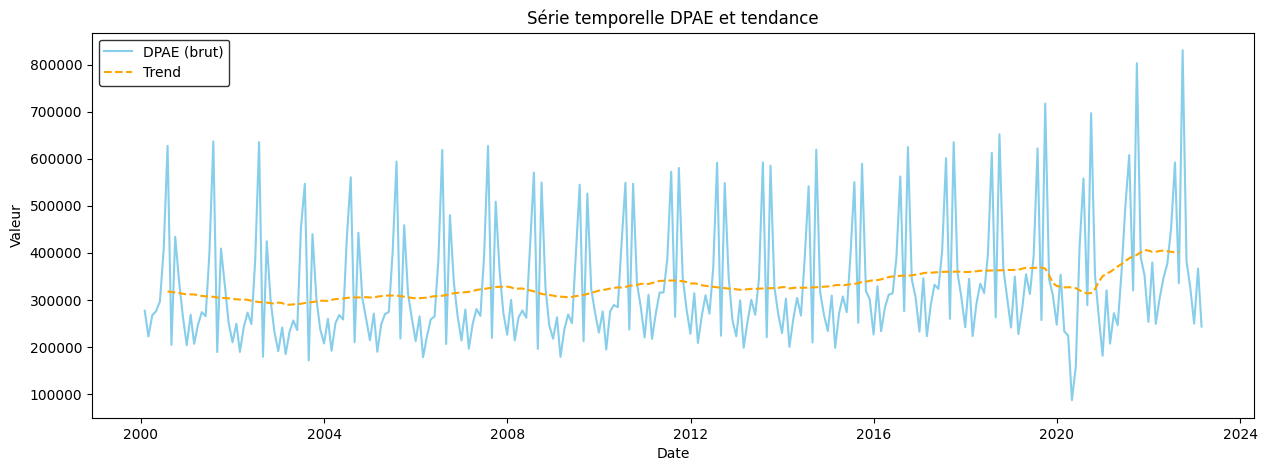

In [ ]:
decomposition = seasonal_decompose(ts_cdd, period=12)

fig, ax = plt.subplots()
ax.plot(ts_cdd.index, ts_cdd, color='skyblue', linestyle='-', label='DPAE (brut)')
ax.plot(ts_cdd.index, decomposition.trend, color='orange', linestyle='--', label='Trend')
ax.set_title("Série temporelle DPAE et tendance")
ax.set_xlabel("Date")
ax.set_ylabel("Valeur")

ax.legend(loc='upper left', frameon=True, edgecolor='black')
plt.show()


On pourrait dire qu'il y a une faible tendance à la hausse.

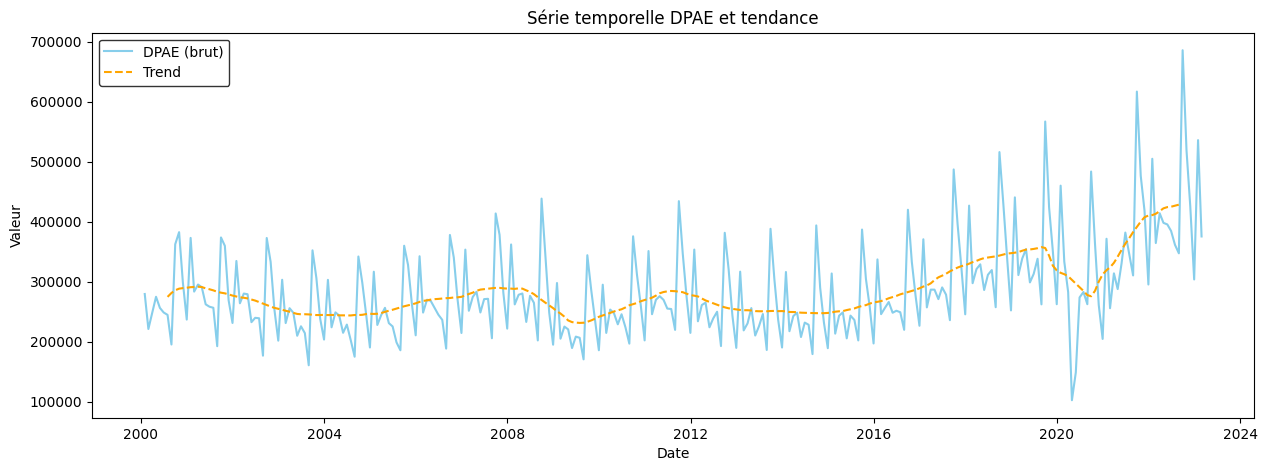

In [ ]:
decomposition = seasonal_decompose(ts_cdi, period=12)

fig, ax = plt.subplots()
ax.plot(ts_cdi.index, ts_cdi, color='skyblue', linestyle='-', label='DPAE (brut)')
ax.plot(ts_cdi.index, decomposition.trend, color='orange', linestyle='--', label='Trend')
ax.set_title("Série temporelle DPAE et tendance")
ax.set_xlabel("Date")
ax.set_ylabel("Valeur")

ax.legend(loc='upper left', frameon=True, edgecolor='black')
plt.show()


Pour les cdi la tendance à la hausse est encore plus visible.

Nettoyer les données EESSA


In [ ]:
df2 = pd.read_excel('famille_EMPLOI.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df2.head()

,Libellé,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,...,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4,2022-T1,2022-T2,2022-T3,2022-T4
0,Emplois salariés trimestriels - Secteurs princ...,1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1,Emplois salariés trimestriels - Industrie - Se...,1577235,09/03/2023 07:30,NaN,5440.3,5459.1,5487.7,5522.1,5526.9,5536,...,3164.3,3156.8,3167.2,3175.2,3187.6,3198.2,3203.8,3214.1,3228.2,3235.8
2,Emplois salariés trimestriels - Construction -...,1577236,09/03/2023 07:30,NaN,1807.9,1807.2,1811.8,1815.7,1808.8,1804.8,...,1516.3,1530.4,1551.1,1560.5,1574.3,1581.4,1585.6,1587.9,1591.6,1592.4
3,Emplois salariés trimestriels - Tertiaire marc...,1577237,09/03/2023 07:30,NaN,5320,5312,5346.7,5399.6,5453.9,5509.1,...,12465.2,12386.5,12511.7,12771.4,12949.8,13113.7,13197.4,13280.2,13349.9,13375.9
4,Emplois salariés trimestriels - Industries ext...,1577241,09/03/2023 07:30,NaN,294.7,294.9,295.4,295.7,295.8,296.1,...,388.2,388.7,391.1,392.7,394.3,394.6,395.1,397,399.5,401.3


In [ ]:
#on supprime les colonnes indésirables
df2.drop(['idBank','Période','Dernière mise à jour'],axis=1,inplace=True)
df2.head()

,Libellé,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,...,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4,2022-T1,2022-T2,2022-T3,2022-T4
0,Emplois salariés trimestriels - Secteurs princ...,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,12815.4,12922.1,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1,Emplois salariés trimestriels - Industrie - Se...,5440.3,5459.1,5487.7,5522.1,5526.9,5536,5556.9,5583,5621.2,...,3164.3,3156.8,3167.2,3175.2,3187.6,3198.2,3203.8,3214.1,3228.2,3235.8
2,Emplois salariés trimestriels - Construction -...,1807.9,1807.2,1811.8,1815.7,1808.8,1804.8,1804.8,1805.7,1816.9,...,1516.3,1530.4,1551.1,1560.5,1574.3,1581.4,1585.6,1587.9,1591.6,1592.4
3,Emplois salariés trimestriels - Tertiaire marc...,5320,5312,5346.7,5399.6,5453.9,5509.1,5535.5,5589.3,5648.4,...,12465.2,12386.5,12511.7,12771.4,12949.8,13113.7,13197.4,13280.2,13349.9,13375.9
4,Emplois salariés trimestriels - Industries ext...,294.7,294.9,295.4,295.7,295.8,296.1,296,296.5,296.9,...,388.2,388.7,391.1,392.7,394.3,394.6,395.1,397,399.5,401.3


In [15]:
#une fonction qui retourne le secteur
def sector(name):
  secteur = "-".join(name.split("-")[1:])
  return secteur.strip()

In [ ]:
df2['Libellé'] = df2['Libellé'].apply(sector) #on applique cette fonction pour retourner le nom du secteur

In [ ]:
df2=df2.set_index('Libellé')

In [ ]:
df2=df2.transpose() # on transpose notre dataframe pour utiliser les temps en ligne et les secteurs en colonnes

In [ ]:
#ici on va créer une serie temporelle par trimestre de meme longueur que nos données et contenant les memes dates
date_range = pd.date_range(start='1970-10-01', end='2022-12-31', freq='Q') 
date_range

DatetimeIndex(['1970-12-31', '1971-03-31', '1971-06-30', '1971-09-30',
               '1971-12-31', '1972-03-31', '1972-06-30', '1972-09-30',
               '1972-12-31', '1973-03-31',
               ...
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
               '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', length=209, freq='Q-DEC')

In [ ]:
df2['trimestre']=date_range

In [ ]:
df2=df2.set_index('trimestre')

In [16]:
#on remplace les (O) par de Na
df2.replace("(O)", np.nan, inplace=True)
df2

NameError: ignored

In [ ]:
df2['Total'] = df2.sum(axis=1) # on somme la totalité des secteurs

<Axes: xlabel='trimestre'>

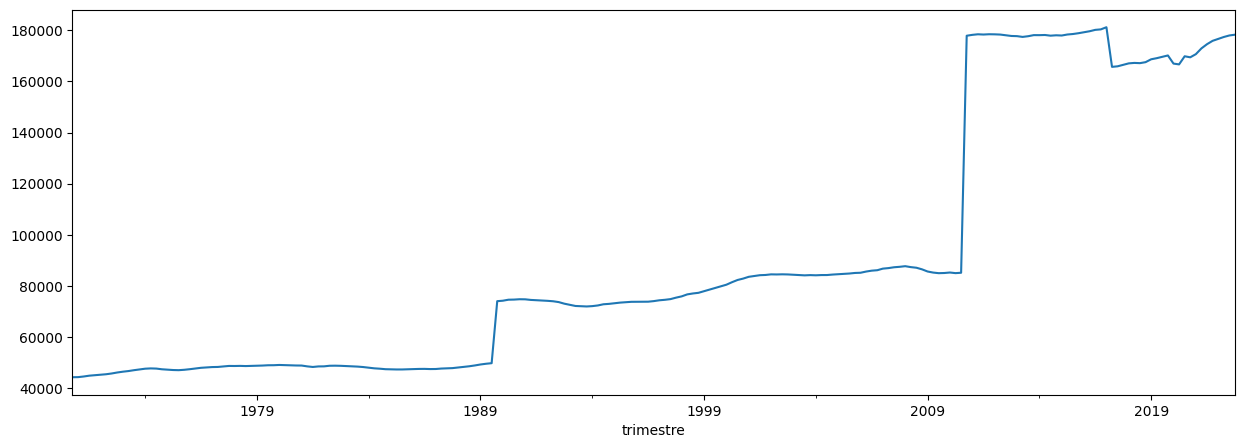

In [ ]:
df2['Total'].plot()

A ce stade , on peut clairement voir une tedance à la hausse entre les années 1970-2023

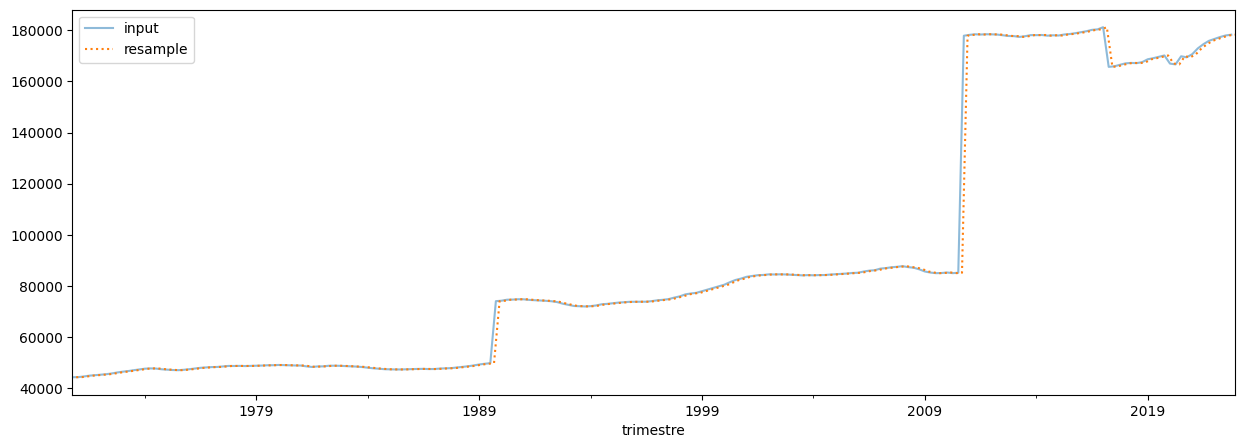

In [ ]:
# Resample the data and plot on the same figure
ax = df2['Total'].plot(alpha=0.5, style='-')

df2['Total'].resample('M').interpolate().plot(style=':', ax = ax)

plt.legend(['input', 'resample'], loc='upper left');

# -> It seems there is a global decreasing trend.

La moyenne mobile confirme cette remarque ! 

Premier secteur choisi : Secteurs principalement marchands

<Axes: xlabel='trimestre'>

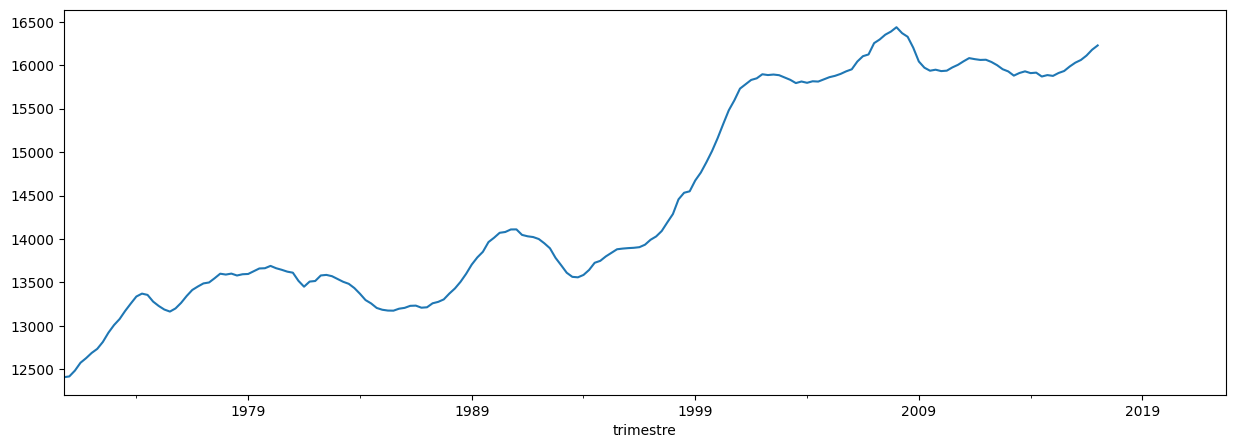

In [ ]:
df2['Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].plot()

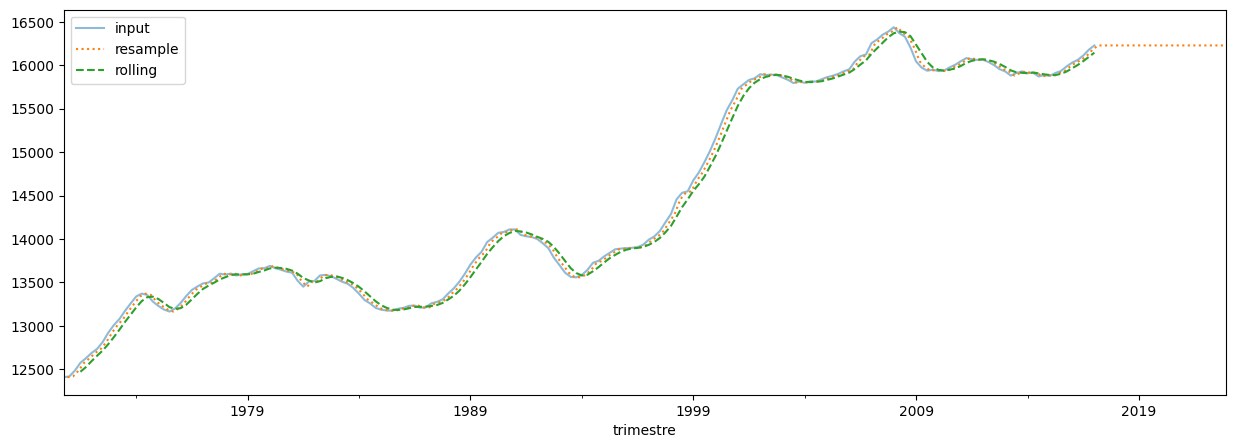

In [ ]:

rolling = df2['Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].rolling(window=4).mean()
ax = df2['Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].plot(alpha=0.5, style='-')

df2['Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].resample('M').interpolate().plot(style=':', ax = ax)

rolling.plot(style='--', ax = ax)
plt.legend(['input', 'resample','rolling'], loc='upper left');


Le secteur principalement marchand est l'un des secteurs qui connait une tendance à la hausse lui aussi, cela apparait via la moyenne glissante.

In [ ]:
df_marchand = df2['Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée']


Deuxième secteur choisi : Hébergement et restauration

<Axes: xlabel='trimestre'>

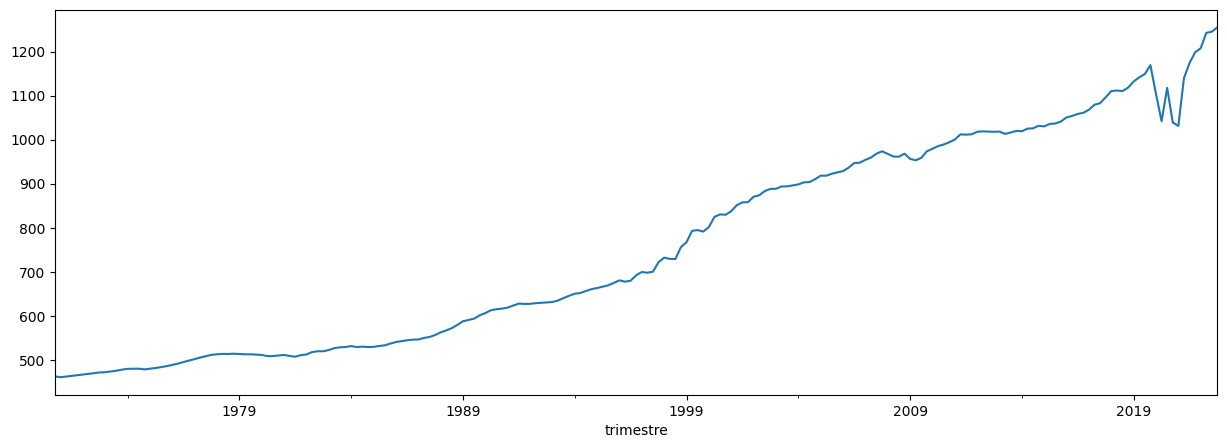

In [ ]:
df2['Hébergement et restauration - A38 : IZ - CVS'].plot()

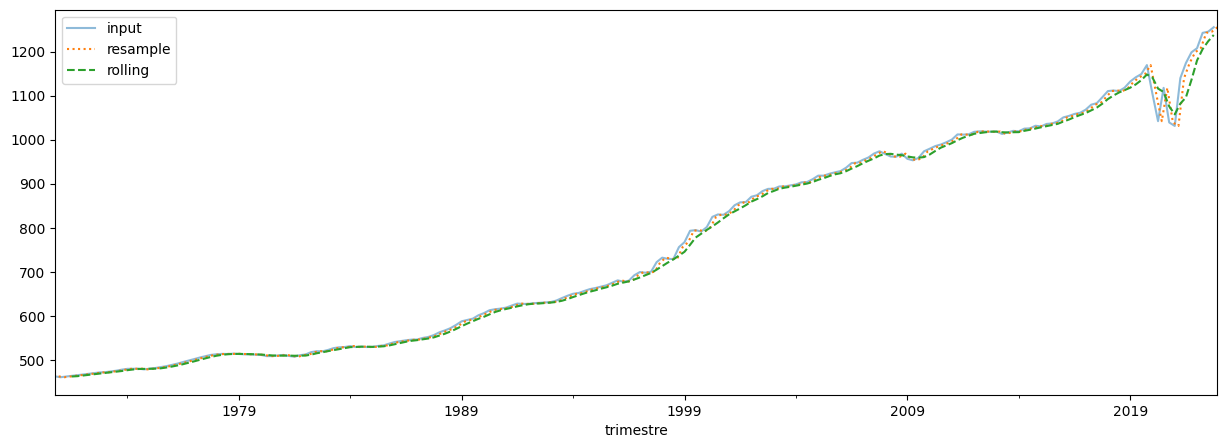

In [ ]:
rolling = df2['Hébergement et restauration - A38 : IZ - CVS'].rolling(window=4).mean()
ax = df2['Hébergement et restauration - A38 : IZ - CVS'].plot(alpha=0.5, style='-')

df2['Hébergement et restauration - A38 : IZ - CVS'].resample('M').interpolate().plot(style=':', ax = ax)

rolling.plot(style='--', ax = ax)
plt.legend(['input', 'resample','rolling'], loc='upper left');

De meme, le secteur Hébergement et restauration évolue lui aussi de façon remarquable lui aussi .

In [ ]:
df_hebergement = df2['Hébergement et restauration - A38 : IZ - CVS']

Quelques statistiques

In [ ]:
df2['year']= df2.index.year
df2['quarter']=df2.index.quarter

In [ ]:
dfHebergement = df2[['Hébergement et restauration - A38 : IZ - CVS','year','quarter']]
dfHebergement.head()

Libellé,Hébergement et restauration - A38 : IZ - CVS,year,quarter
trimestre,,,
1970-12-31,462.8,1970,4
1971-03-31,460.9,1971,1
1971-06-30,462.4,1971,2
1971-09-30,464.1,1971,3
1971-12-31,465.6,1971,4


In [ ]:
grouppedyear = dfHebergement.groupby('year')
grouppedyear['Hébergement et restauration - A38 : IZ - CVS'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1970,1.0,462.800,NaN,462.8,462.800,462.80,462.800,462.8
1971,4.0,463.250,2.040425,460.9,462.025,463.25,464.475,465.6
1972,4.0,469.300,2.096028,467.0,467.975,469.20,470.525,471.8
1973,4.0,475.000,2.489980,472.3,473.500,474.80,476.300,478.1
1974,4.0,479.725,0.704154,478.7,479.600,479.95,480.075,480.3
1975,4.0,482.950,2.510644,480.2,481.400,482.80,484.350,486.0
1976,4.0,493.725,4.226405,489.0,491.100,493.60,496.225,498.7
1977,4.0,506.975,4.069705,502.1,504.725,507.10,509.350,511.6
1978,4.0,513.700,0.547723,513.0,513.450,513.75,514.000,514.3


On peut observer une tendance à l'augmentation des valeurs, avec quelques fluctuations d'une année à l'autre. Les valeurs les plus élevées ont été enregistrées en fin de période, en particulier à partir de la fin des années 1990, avec une augmentation significative enregistrée entre 2000 et 2019 suivi d'une chute chose qui est logique en période de confinement à cause du COVID 19.

In [ ]:
grouppedyear = dfHebergement.groupby('quarter')
grouppedyear['Hébergement et restauration - A38 : IZ - CVS'].describe()

,count,mean,std,min,25%,50%,75%,max
quarter,,,,,,,,
1,52.0,753.890385,231.449936,460.9,528.025,690.15,970.60,1207.5
2,52.0,758.788462,235.131043,462.4,528.775,687.85,967.60,1242.3
3,52.0,763.453846,238.690749,464.1,529.925,690.15,973.45,1245.0
4,53.0,761.196226,240.470159,462.8,529.400,692.40,973.60,1255.1


# Saisonnalité et corrélations

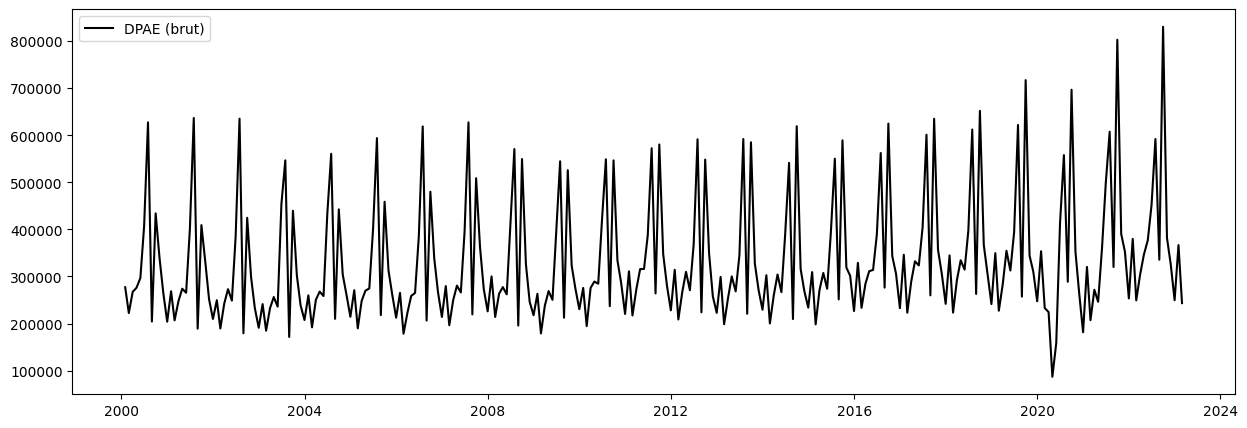

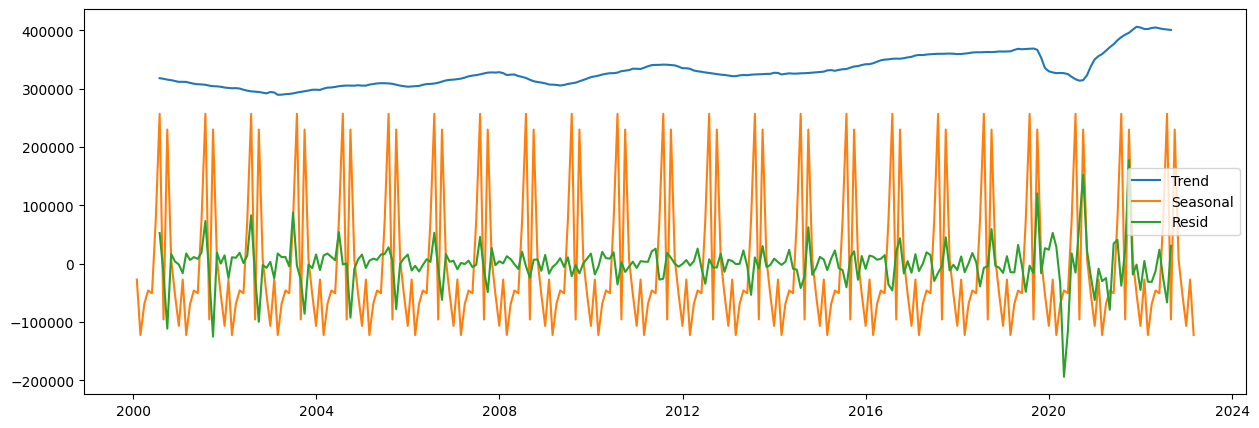

In [ ]:
#seasonal decomposition pour cdd
decomposition = seasonal_decompose(ts_cdd,period=12) 

plt.plot(ts_cdd.index, ts_cdd, 'k')
plt.legend(['DPAE (brut)'])
plt.figure()
plt.plot(ts_cdd.index,decomposition.trend)
plt.plot(ts_cdd.index,decomposition.seasonal)
plt.plot(ts_cdd.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

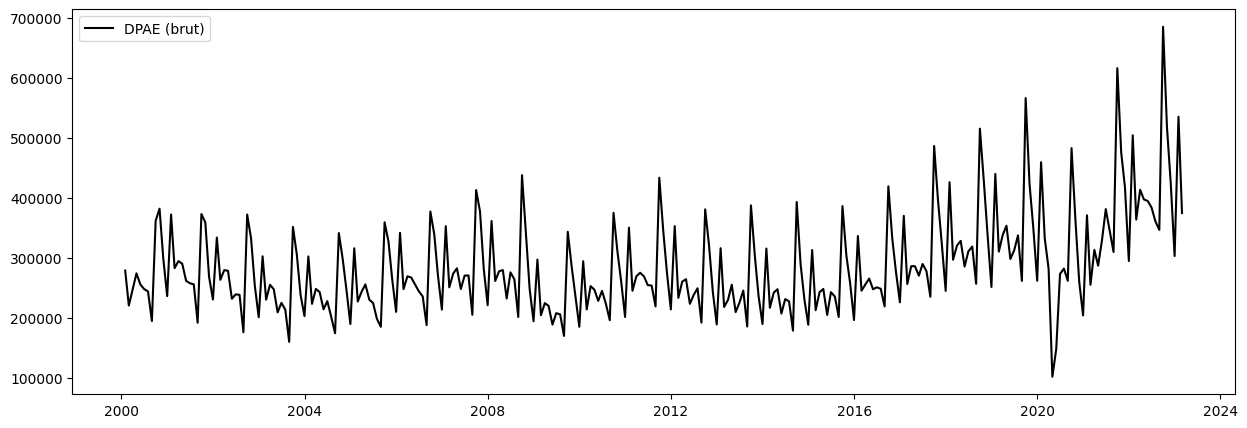

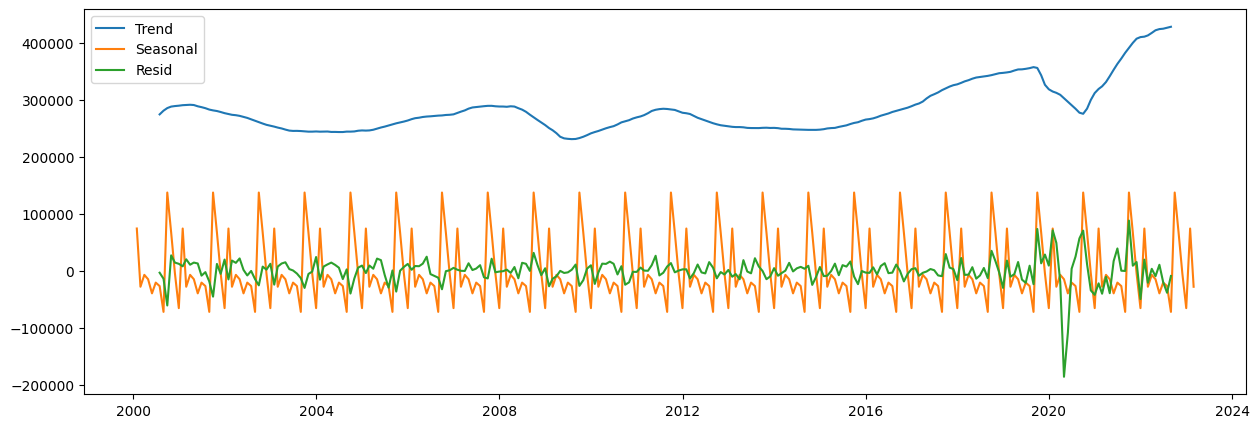

In [ ]:
#seasonal decomposition pour cdi
decomposition = seasonal_decompose(ts_cdi,period=12) 

plt.plot(ts_cdi.index, ts_cdi, 'k')
plt.legend(['DPAE (brut)'])
plt.figure()
plt.plot(ts_cdi.index,decomposition.trend)
plt.plot(ts_cdi.index,decomposition.seasonal)
plt.plot(ts_cdi.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

Que ce soit pour les CDI ou CDD, on a une saisonnalité additive apparente d'une période de 12 mois

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

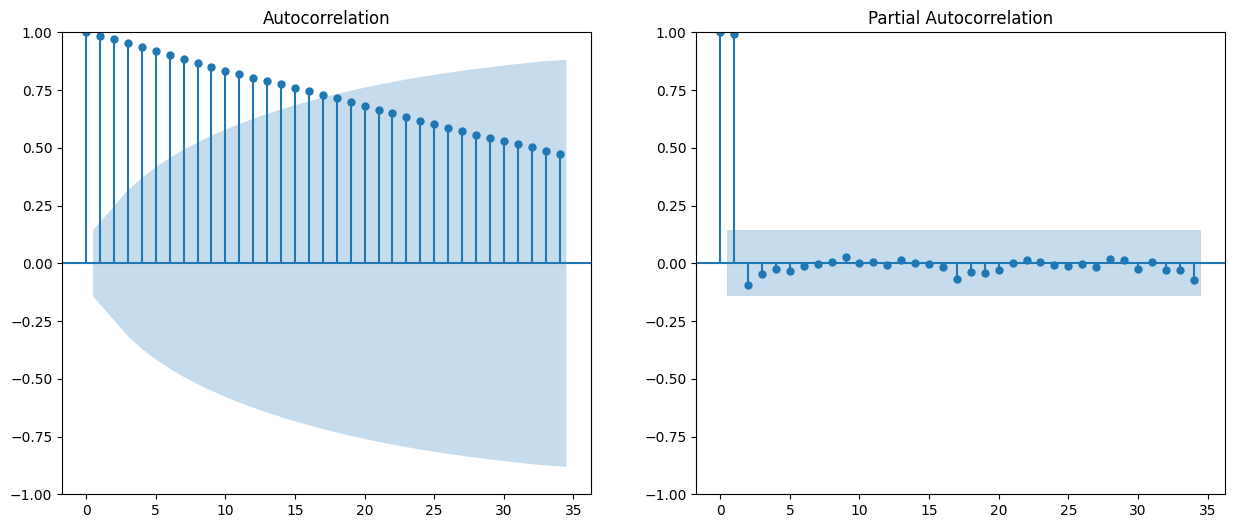

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plot_acf(df_marchand.dropna(), lags=34, ax=ax1)  # Adjust lags as needed
plot_pacf(df_marchand.dropna(), lags=34, ax=ax2)  # Adjust lags as needed
plt.show

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

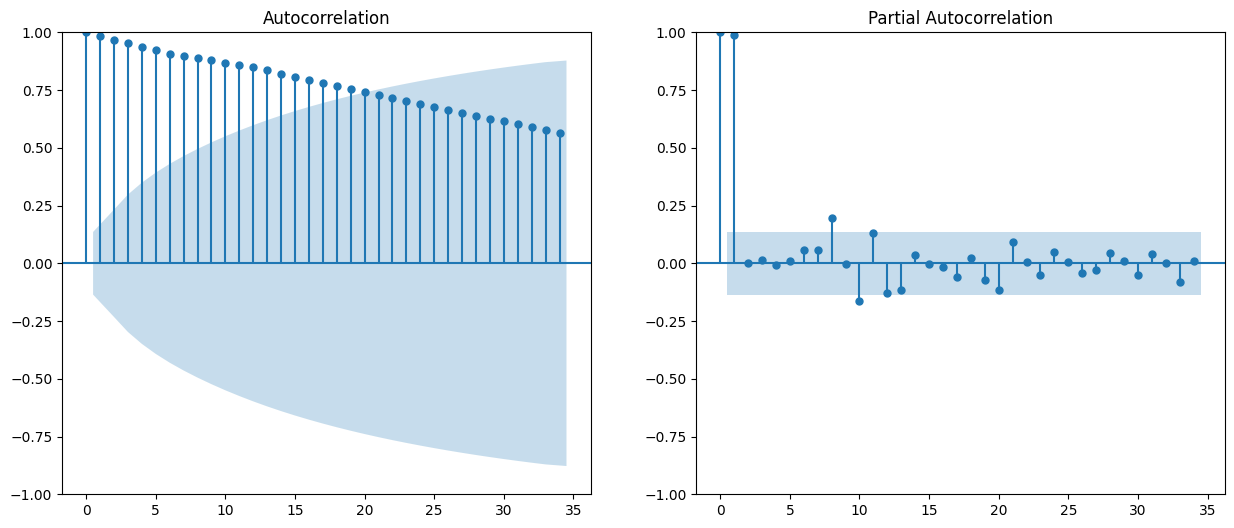

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plot_acf(df_hebergement.dropna(), lags=34, ax=ax1)  # Adjust lags as needed
plot_pacf(df_hebergement.dropna(), lags=34, ax=ax2)  # Adjust lags as needed
plt.show

On ne trouvez pas de saisonnalité dans le graphe d'autocorrélation, cela peut indiquer que nos séries temporelles pour nos deux secteurs n'ont pas de motif saisonnier clair voire meme absence

# Correlation entre CDI/CDD et nos deux secteurs

On effectue un sous-échantillonnage de la série temporelle mensuelle (cdd) pour qu'elle corresponde à la résolution trimestrielle de la série de notre secteur EESSA

In [ ]:
cdd_quartly = ts_cdd.resample('Q').mean()

In [ ]:
result = adfuller(cdd_quartly)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.173703
p-value: 0.970747


In [ ]:
df_marchand = df_marchand.dropna()

In [ ]:
result = adfuller(df_marchand)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.754359
p-value: 0.832163


On rend nos séries stationnaires

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

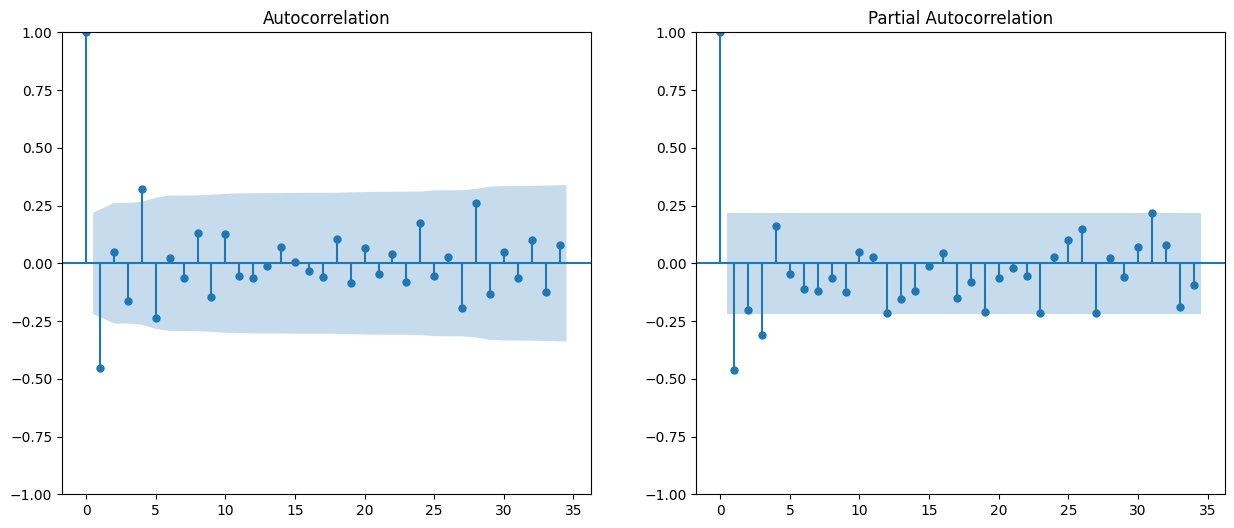

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plot_acf(cdd_quartly.diff().diff(12).dropna(), lags=34, ax=ax1)  # Adjust lags as needed
plot_pacf(cdd_quartly.diff().diff(12).dropna(), lags=34, ax=ax2)  # Adjust lags as needed
plt.show

In [ ]:
cdd_quartly = cdd_quartly.diff().diff(12).dropna()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

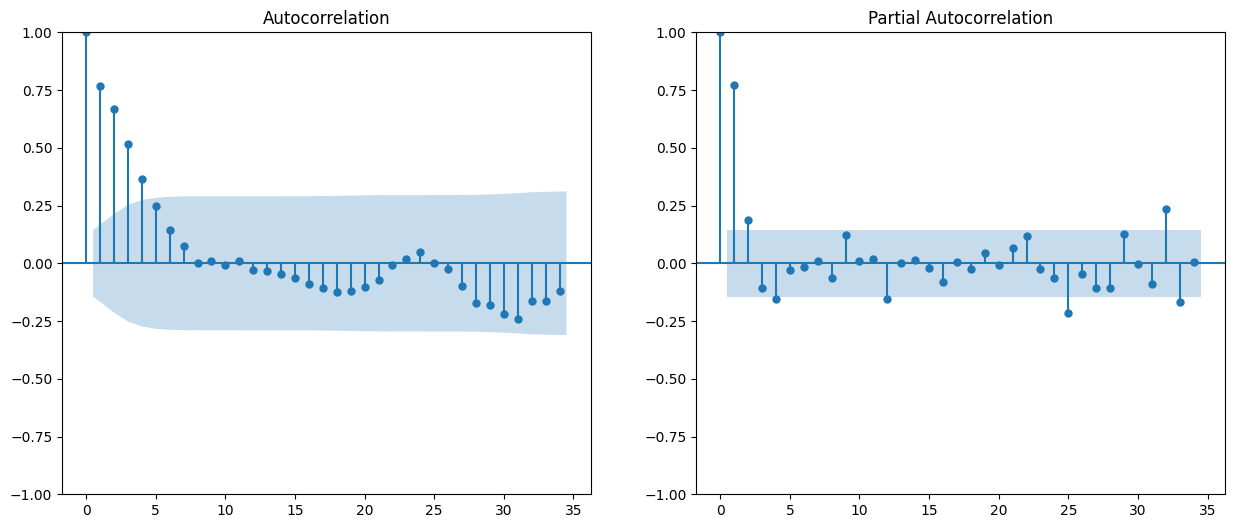

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plot_acf(df_marchand.diff().dropna(), lags=34, ax=ax1)  # Adjust lags as needed
plot_pacf(df_marchand.diff().dropna(), lags=34, ax=ax2)  # Adjust lags as needed
plt.show

In [ ]:
result = adfuller(df_marchand.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.455626
p-value: 0.000236


In [ ]:
df_marchand_diff=df_marchand.diff().dropna()

In [ ]:
common_start = max(cdd_quartly.index.min(), df_marchand_diff.index.min())
common_end = min(cdd_quartly.index.max(),df_marchand_diff.index.max())
cdd_quarterly_aligned = cdd_quartly[common_start:common_end]
s1_quarterly_aligned = df_marchand_diff[common_start:common_end]

In [ ]:
correlation = np.corrcoef(cdd_quarterly_aligned['DPAE (brut)'], s1_quarterly_aligned)[0,1]
print("Corrélation entre DPAE_quarterly et EESSA_quarterly :", correlation)

Corrélation entre DPAE_quarterly et EESSA_quarterly : 0.1867462521126203


Le résultat obtenu montre qu'il y a une corrélation positive faible (0.187) entre les données de DPAE (brut) et d'EESSA, qui sont toutes deux alignées par trimestre. Cela indique qu'il y a une certaine relation entre ces deux variables

# Forecast CDD

Sesonal Holt-Winters exponential smoothing

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


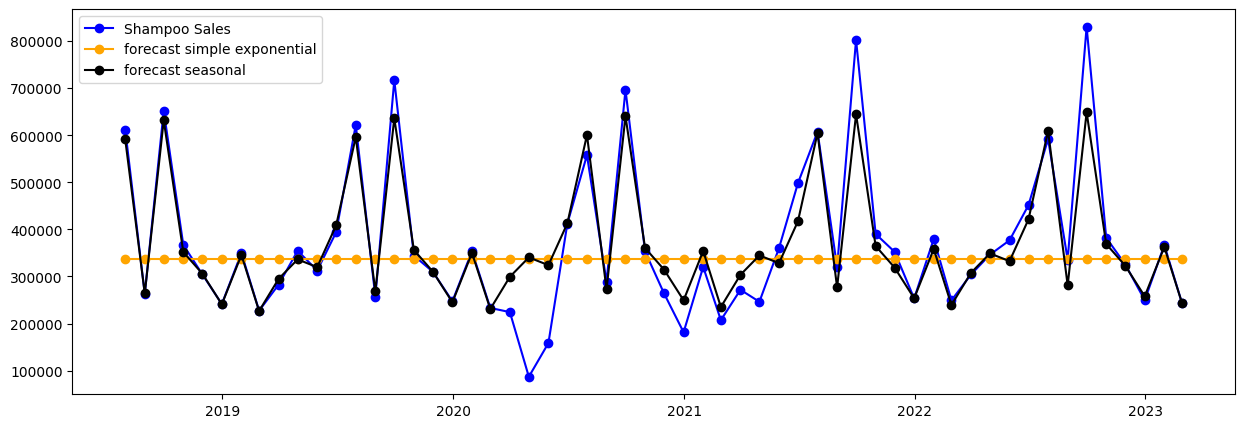

mean squared error holt seasonal =  3715327962.9171395


In [ ]:
#on commence tout d'abord par diviser nos données en training set et test set
train_size = int(len(ts_cdd) * 0.8)
train_cdd, test_cdd = ts_cdd[:train_size], ts_cdd[train_size:]
fit1 = SimpleExpSmoothing(train_cdd, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False)

forecast = fit1.forecast(len(test_cdd))

fit2 = ExponentialSmoothing(
    train_cdd,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated",
).fit()
forecast2 = fit2.forecast(len(test_cdd))
plt.plot(test_cdd, marker="o", color="blue", label='Shampoo Sales')
plt.plot(forecast, marker="o", color="orange", label='forecast simple exponential')
plt.plot(forecast2, marker="o", color="black", label='forecast seasonal ')
plt.legend()
plt.show()
#on affiche nos prédiction sur le test
print("mean squared error holt seasonal = " ,mean_squared_error(test_cdd,forecast2))

prédire les emplois (CDD) de avril à juin 2023 avec le modèle Seasonal Holt-Winters

In [ ]:
start_date = pd.to_datetime('2023-04-30')
end_date = pd.to_datetime('2023-06-30')
prediction = fit2.predict(start_date,end_date)
print(prediction)

2023-04-30    353245.644794
2023-05-31    336769.511850
2023-06-30    425701.743249
Freq: M, dtype: float64


Sarima model

In [ ]:
SARIMA_model = pm.auto_arima(train_cdd, m=12)
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  222
Model:             SARIMAX(2, 0, 2)x(2, 1, [1], 12)   Log Likelihood               -2370.457
Date:                              Mon, 10 Apr 2023   AIC                           4758.913
Time:                                      04:27:39   BIC                           4789.037
Sample:                                  01-31-2000   HQIC                          4771.091
                                       - 06-30-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1731.1567    826.653      2.094      0.036     110.946    3351.368
ar.L1          1.0461      0.117      8.921      0.000       0.816       1.276
ar.L2         -0.7393      0.100     -7.398      0.000      -0.935      -0.543
ma.L1         -1.0820      0.088    -12.324      0.000      -1.254      -0.910
ma.L2          0.8656      0.074     11.685      0.000       0.720       1.011
ar.S.L12       0.3989      0.186      2.140      0.032       0.033       0.764
ar.S.L24      -0.0390      0.023     -1.728      0.084      -0.083       0.005
ma.S.L12      -0.4487      0.188     -2.383      0.017      -0.818      -0.080
sigma2      3.855e+08      0.002   1.68e+11      0.000    3.86e+08    3.86e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                15.01
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.20
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.45e+26. Standard errors may be unstable.
"""

In [ ]:
model = SARIMAX(train_cdd, order=(2,0,2),seasonal_order=(2, 1, 2,12))
model_cdd = model.fit()
model_cdd.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        DPAE (brut)   No. Observations:                  222
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 12)   Log Likelihood               -2367.110
Date:                            Mon, 10 Apr 2023   AIC                           4752.220
Time:                                    04:28:59   BIC                           4782.344
Sample:                                01-31-2000   HQIC                          4764.398
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0277      0.119      8.610      0.000       0.794       1.262
ar.L2         -0.7581      0.099     -7.624      0.000      -0.953      -0.563
ma.L1         -1.0707      0.089    -12.011      0.000      -1.245      -0.896
ma.L2          0.8808      0.072     12.287      0.000       0.740       1.021
ar.S.L12       0.9008      0.086     10.453      0.000       0.732       1.070
ar.S.L24      -0.9445      0.085    -11.123      0.000      -1.111      -0.778
ma.S.L12      -0.9224      0.093     -9.908      0.000      -1.105      -0.740
ma.S.L24       0.9328      0.094      9.871      0.000       0.748       1.118
sigma2      3.882e+08   1.53e-10   2.53e+18      0.000    3.88e+08    3.88e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                17.78
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.56e+34. Standard errors may be unstable.
"""

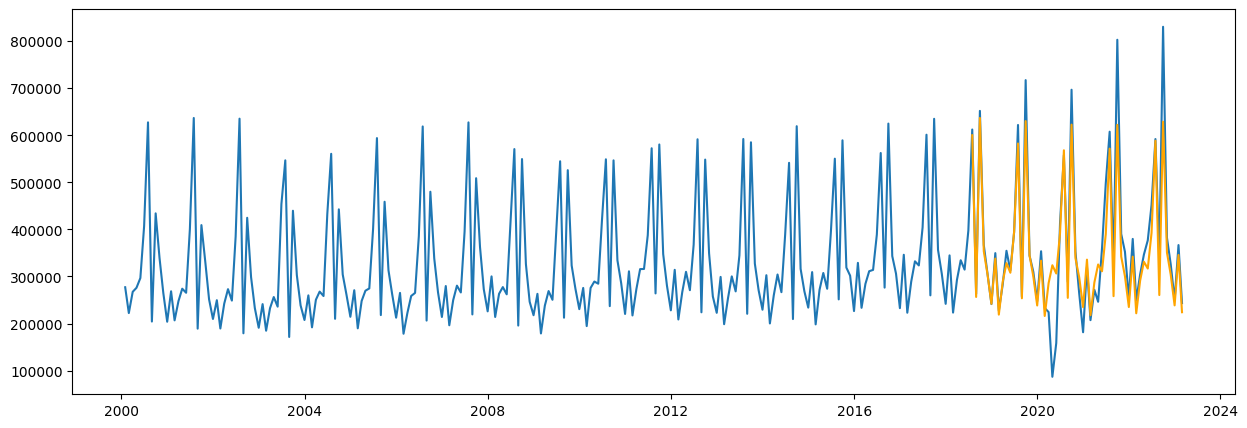

In [ ]:
pred = model_cdd.predict(start=test_cdd.index[0],end=test_cdd.index[-1])
plt.plot(ts_cdd['DPAE (brut)'])
plt.plot(pred,color='orange')

prédire les emplois (CDD) de avril à juin 2023 avec le modèle SARIMA

In [ ]:
start_date = pd.to_datetime('2023-04-30')
end_date = pd.to_datetime('2023-06-30')
prediction = model_cdd.predict(start=start_date, end=end_date)
print(prediction)

2023-04-30    334991.302588
2023-05-31    317628.127036
2023-06-30    395989.317646
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
predictions = model_cdd.predict(start=test_cdd.index[0], end=test_cdd.index[-1])
rmse = mean_squared_error(test_cdd,predictions)
# Print RMSE
print('RMSE: %.3f' % rmse)

RMSE: 4059547109.424


# Forecast CDI

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


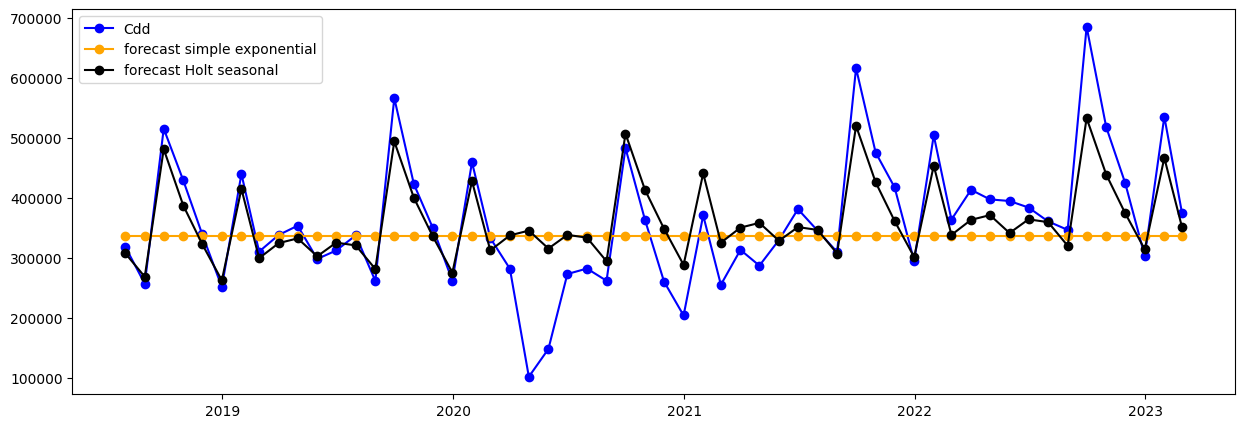

In [ ]:
#lissage exponentielle pour les cdi

train_size = int(len(ts_cdi) * 0.8)
train_cdi, test_cdi = ts_cdi[:train_size], ts_cdi[train_size:]
fit21 = SimpleExpSmoothing(train_cdi, initialization_method="heuristic").fit(smoothing_level=0.2, optimized=False)

forecast21 = fit1.forecast(len(test_cdi))

fit22 = ExponentialSmoothing(
    train_cdi,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated",
).fit()
forecast22 = fit22.forecast(len(test_cdi))
plt.plot(test_cdi, marker="o", color="blue", label='Cdd')
plt.plot(forecast21, marker="o", color="orange", label='forecast simple exponential')
plt.plot(forecast22, marker="o", color="black", label='forecast Holt seasonal ')
plt.legend()
plt.show()

prédire les emplois (CDI) de avril à juin 2023 avec le modèle Seasonal Holt-Winters

In [ ]:
start_date = pd.to_datetime('2023-04-30')
end_date = pd.to_datetime('2023-06-30')
prediction = fit22.predict(start_date,end_date)
print(prediction)

2023-04-30    384638.032072
2023-05-31    354799.832819
2023-06-30    377571.589016
Freq: M, dtype: float64


SARIMA Model

In [ ]:
SARIMA_model = pm.auto_arima(train_cdi, m=12)
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  222
Model:             SARIMAX(1, 0, 2)x(2, 1, 2, 12)   Log Likelihood               -2323.967
Date:                            Mon, 10 Apr 2023   AIC                           4665.934
Time:                                    04:37:49   BIC                           4696.058
Sample:                                01-31-2000   HQIC                          4678.112
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.2848    674.851      0.537      0.591    -960.398    1684.967
ar.L1          0.7008      0.039     18.012      0.000       0.625       0.777
ma.L1         -0.2291      0.084     -2.722      0.006      -0.394      -0.064
ma.L2          0.0774      0.092      0.840      0.401      -0.103       0.258
ar.S.L12       0.8890      0.106      8.420      0.000       0.682       1.096
ar.S.L24      -0.6713      0.071     -9.458      0.000      -0.810      -0.532
ma.S.L12      -0.9923      0.115     -8.623      0.000      -1.218      -0.767
ma.S.L24       0.6380      0.085      7.484      0.000       0.471       0.805
sigma2      2.319e+08      0.004    6.5e+10      0.000    2.32e+08    2.32e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                34.10
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.17
Prob(H) (two-sided):                  0.45   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.96e+26. Standard errors may be unstable.
"""

In [ ]:
model = SARIMAX(train_cdi, order=(1,0,2),seasonal_order=(2, 1, 2,12))
model_cdi = model.fit()
model_cdi.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        DPAE (brut)   No. Observations:                  222
Model:             SARIMAX(1, 0, 2)x(2, 1, 2, 12)   Log Likelihood               -2325.030
Date:                            Mon, 10 Apr 2023   AIC                           4666.059
Time:                                    04:38:14   BIC                           4692.836
Sample:                                01-31-2000   HQIC                          4676.884
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7352      0.037     19.978      0.000       0.663       0.807
ma.L1         -0.2638      0.078     -3.402      0.001      -0.416      -0.112
ma.L2          0.0582      0.090      0.648      0.517      -0.118       0.234
ar.S.L12       1.2949      0.067     19.336      0.000       1.164       1.426
ar.S.L24      -0.7017      0.053    -13.237      0.000      -0.806      -0.598
ma.S.L12      -1.4592      0.073    -19.889      0.000      -1.603      -1.315
ma.S.L24       0.8044      0.055     14.709      0.000       0.697       0.912
sigma2       2.32e+08   8.18e-11   2.84e+18      0.000    2.32e+08    2.32e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                46.26
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.15
Prob(H) (two-sided):                  0.91   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.69e+33. Standard errors may be unstable.
"""

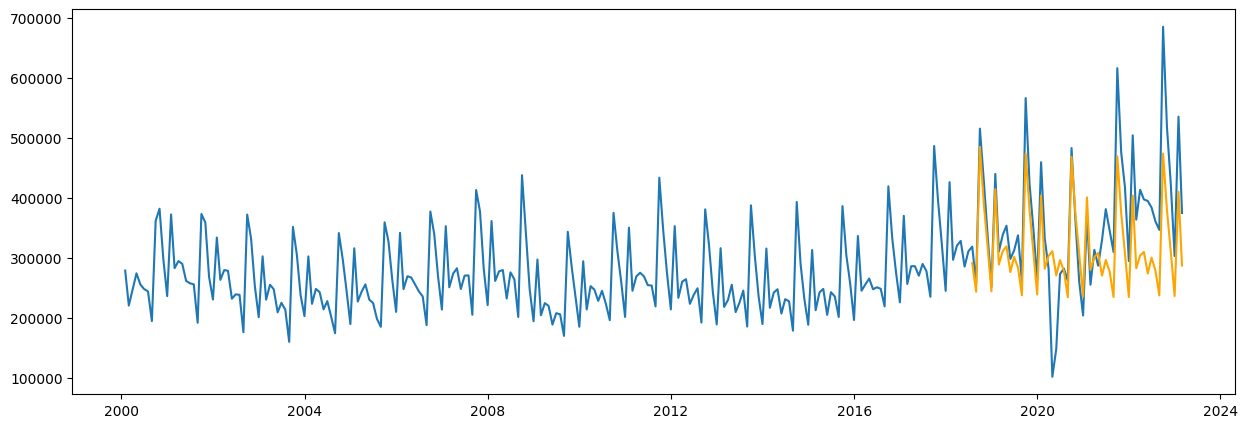

In [ ]:
pred = model_cdi.predict(start=test_cdi.index[0],end=test_cdi.index[-1])
plt.plot(ts_cdi['DPAE (brut)'])
plt.plot(pred,color='orange')

prédire les emplois (CDI) de avril à juin 2023 avec le modèle SARIMA

In [ ]:
start_date = pd.to_datetime('2023-04-30')
end_date = pd.to_datetime('2023-06-30')
prediction = model_cdi.predict(start=start_date, end=end_date)
print(prediction)

2023-04-30    314671.765295
2023-05-31    279250.823897
2023-06-30    305891.458243
Freq: M, Name: predicted_mean, dtype: float64


# Forecast secteur marchand

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


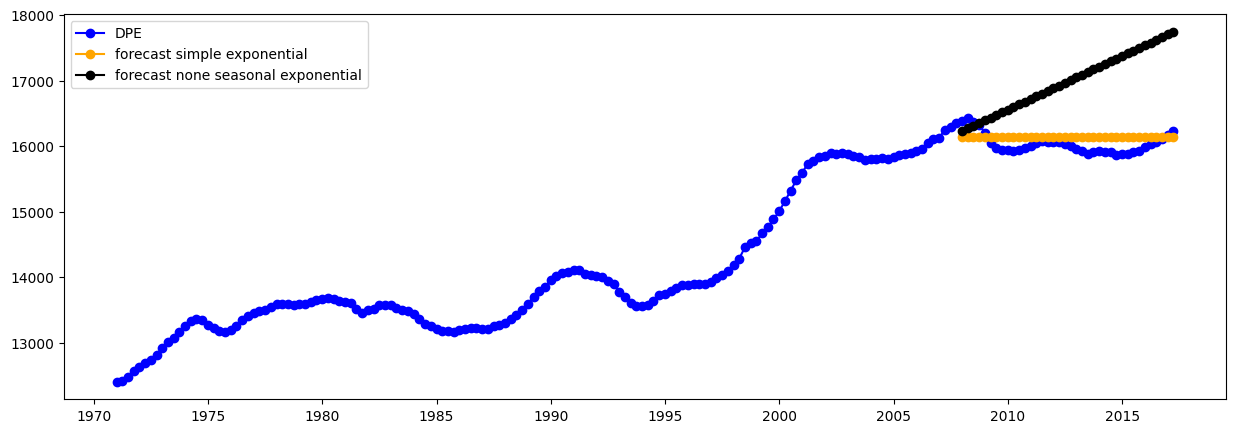

In [ ]:
#lissage exponentiel + None seasonal Holt-Winters pour les Secteurs principalement marchands

train_size = int(len(df_marchand) * 0.8)
train_march, test_march = df_marchand[:train_size], df_marchand[train_size:]
fit1 = SimpleExpSmoothing(train_march, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False)

forecast = fit1.forecast(len(test_march))

fit2 = Holt(train_march, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.2)
forecast2 = fit2.forecast(len(test_march))
plt.plot(df_marchand, marker="o", color="blue", label='DPE')
plt.plot(forecast, marker="o", color="orange", label='forecast simple exponential')
plt.plot(forecast2, marker="o", color="black", label='forecast none seasonal exponential')
plt.legend()
plt.show()

ARIMA MODEL

In [ ]:
ARIMA_model = pm.auto_arima(train_march, seasonal=False)
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  148
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -726.983
Date:                Mon, 10 Apr 2023   AIC                           1463.966
Time:                        04:48:16   BIC                           1478.918
Sample:                    12-31-1970   HQIC                          1470.041
                         - 09-30-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0294      3.613      1.392      0.164      -2.052      12.111
ar.L1          0.8005      0.069     11.606      0.000       0.665       0.936
ma.L1         -0.2029      0.086     -2.361      0.018      -0.371      -0.034
ma.L2          0.1816      0.097      1.881      0.060      -0.008       0.371
sigma2      1143.7057    119.612      9.562      0.000     909.271    1378.141
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                10.45
Prob(Q):                              0.80   Prob(JB):                         0.01
Heteroskedasticity (H):               1.05   Skew:                             0.35
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train_march, order=(1, 1, 2))
model_march = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


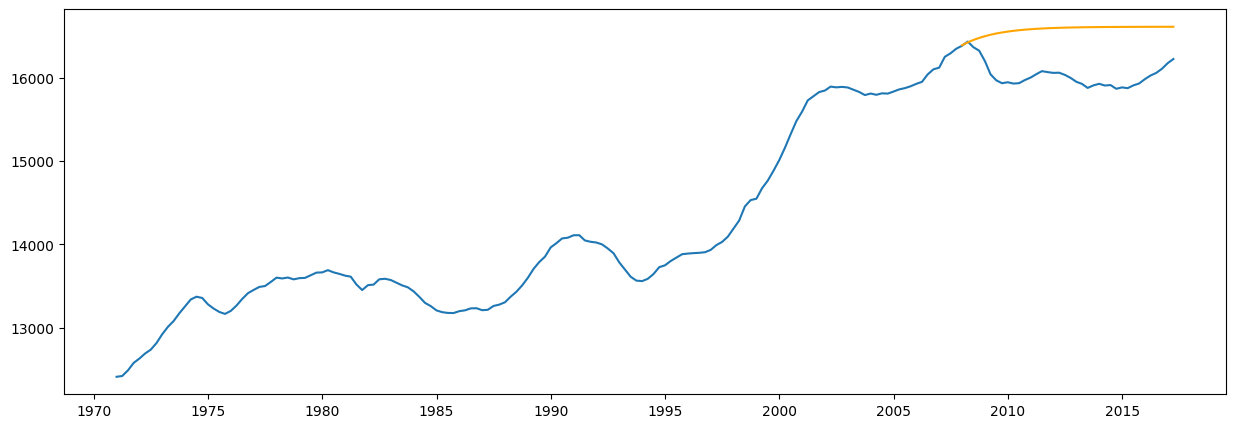

In [ ]:
pred = model_march.predict(start=test_march.index[0],end=test_march.index[-1])
plt.plot(df_marchand)
plt.plot(pred,color='orange')

# Forecast secteur Hebergement

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


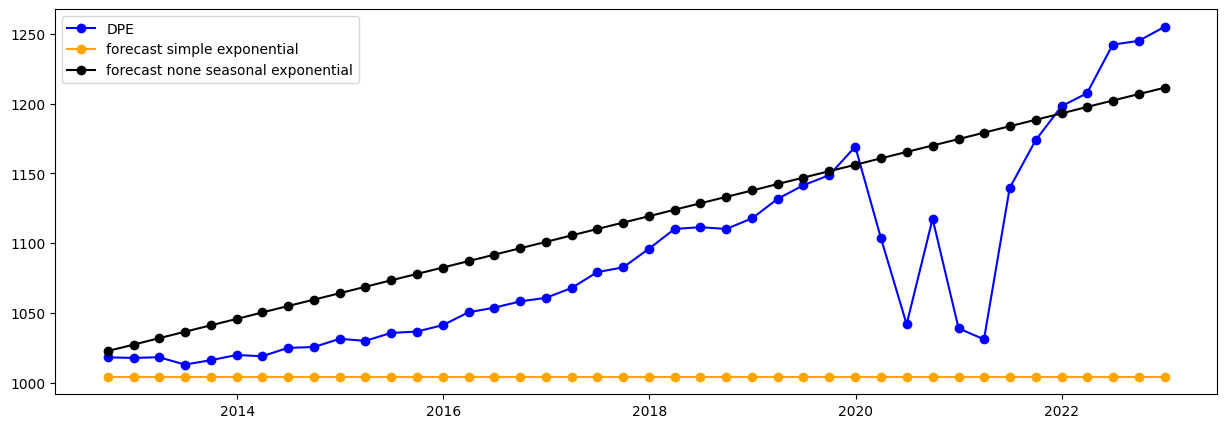

In [ ]:
#lissage exponentiel pour les Secteurs principalement hebergement

train_size = int(len(df_hebergement) * 0.8)
train_heberg, test_heberg = df_hebergement[:train_size], df_hebergement[train_size:]
fit1 = SimpleExpSmoothing(train_heberg, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=True)

forecast = fit1.forecast(len(test_heberg))

fit2 = Holt(train_heberg, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.2)
forecast2 = fit2.forecast(len(test_heberg))
plt.plot(test_heberg, marker="o", color="blue", label='DPE')
plt.plot(forecast, marker="o", color="orange", label='forecast simple exponential')
plt.plot(forecast2, marker="o", color="black", label='forecast none seasonal exponential')
plt.legend()
plt.show()

In [ ]:
ARIMA_model = pm.auto_arima(train_heberg, seasonal=False)
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(3, 2, 1)   Log Likelihood                -478.236
Date:                Mon, 10 Apr 2023   AIC                            966.472
Time:                        04:54:21   BIC                            982.001
Sample:                    12-31-1970   HQIC                           972.776
                         - 06-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3633      0.057     -6.369      0.000      -0.475      -0.252
ar.L2         -0.5194      0.037    -14.000      0.000      -0.592      -0.447
ar.L3         -0.3936      0.056     -7.061      0.000      -0.503      -0.284
ma.L1         -0.3722      0.086     -4.324      0.000      -0.541      -0.203
sigma2        19.1002      1.148     16.638      0.000      16.850      21.350
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               254.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              13.94   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train_heberg, order=(3, 2, 1))
model_heberg = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


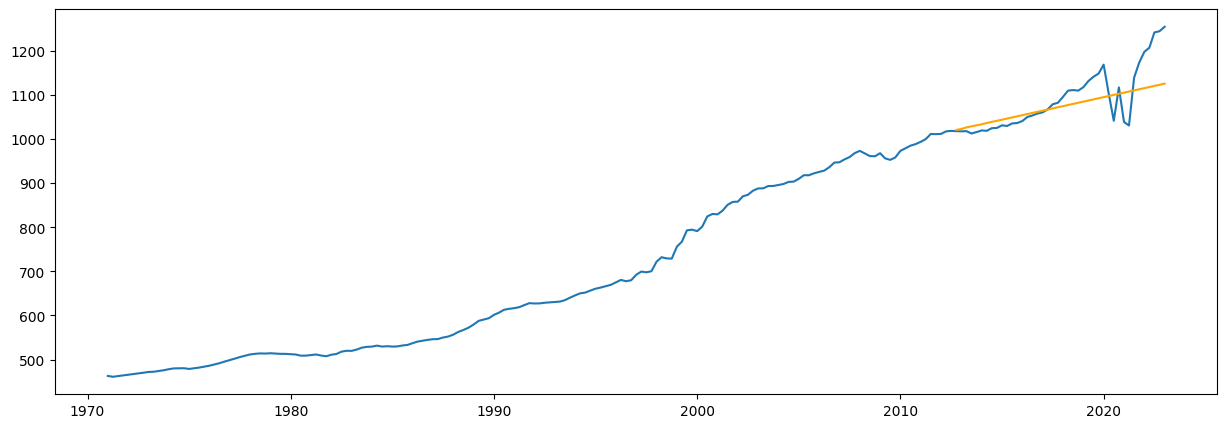

In [ ]:
pred = model_heberg.predict(start=test_heberg.index[0],end=test_heberg.index[-1])
plt.plot(df_hebergement)
plt.plot(pred,color='orange')